In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import numpy as np

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels)=tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Performing image negative transformation**

In [5]:
def neg(image):
  negative = []
  for i in range(len(image)):
    temp = []
    for j in range(len(image[i])):
      s = 256 - 1 - image[i][j]
      temp.append(s)
    negative.append(temp)
  return np.array(negative)

In [6]:
def display(o,t,title1,title2):
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.title(title1)
  plt.imshow(o,cmap='gray')
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.title(title2)
  plt.imshow(t,cmap='gray')
  plt.axis('off')
  plt.show()

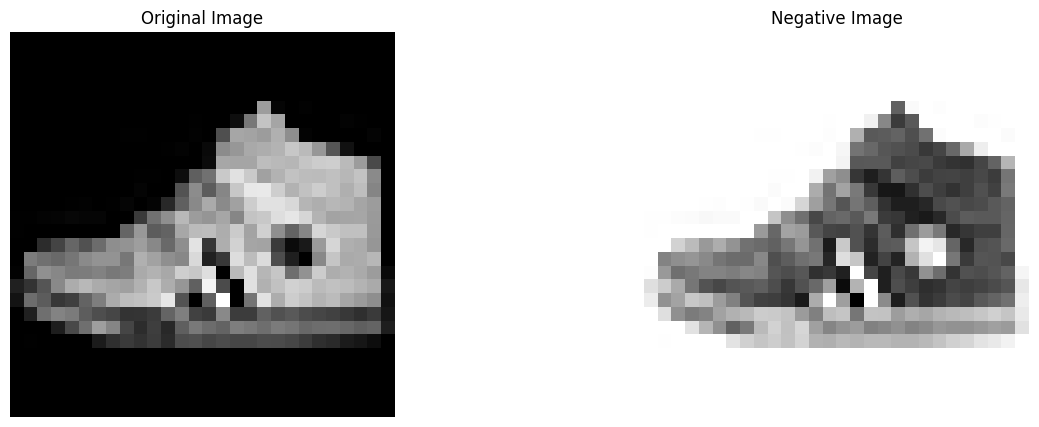

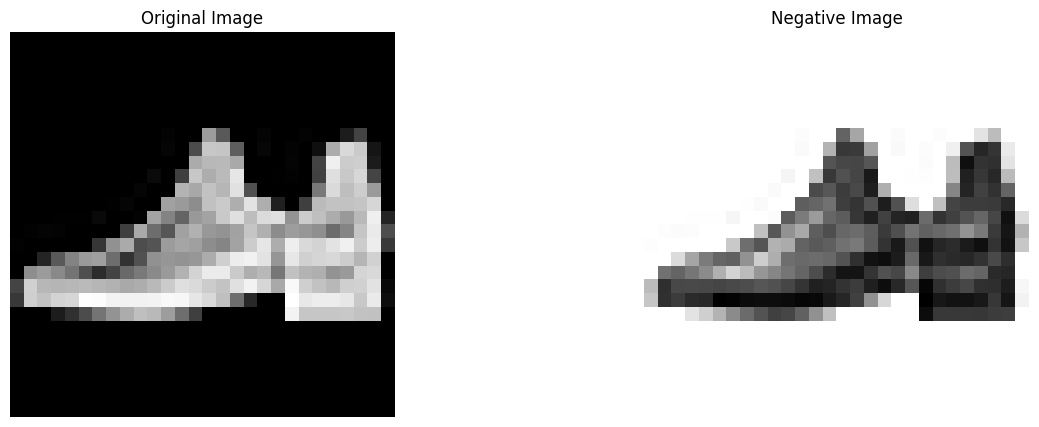

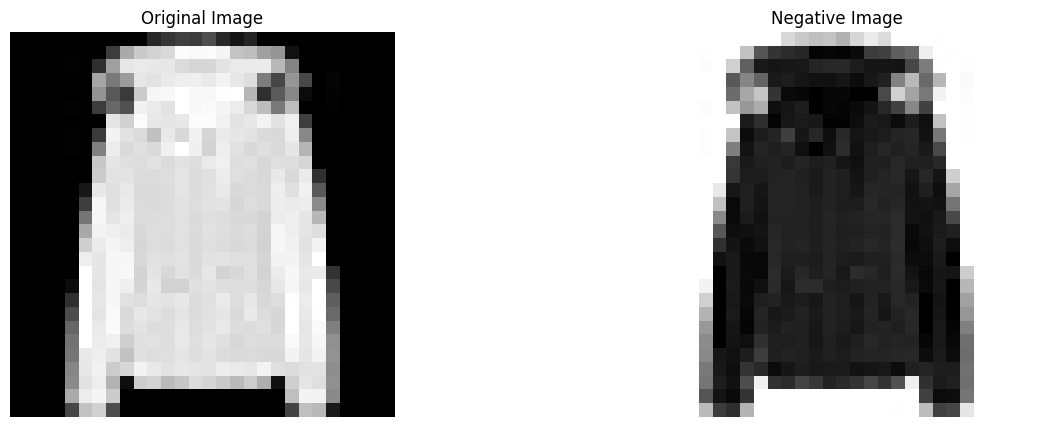

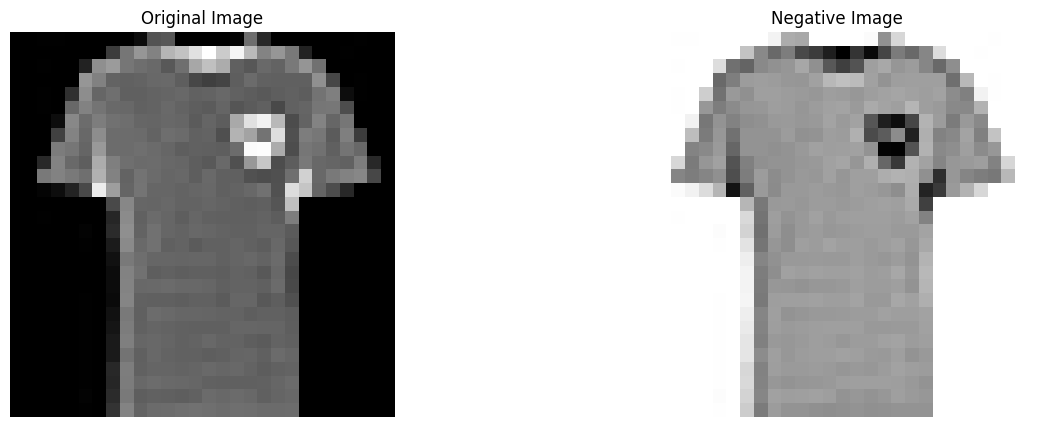

In [7]:
for i in range(4):
  random_index = random.randint(0, len(train_images) - 1)
  img = train_images[random_index]
  img_negative = neg(img)
  display(img, img_negative, 'Original Image', 'Negative Image')


# **Perform image thresholding operation at various threshold level**

In [8]:
def image_thresholding(image,threshold):
  new_image = image.copy()
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if image[i][j] >= threshold:
        new_image[i][j] = 255
      else:
        new_image[i][j] = 0
  return new_image


FOR THRESHOLD VALUE: 10


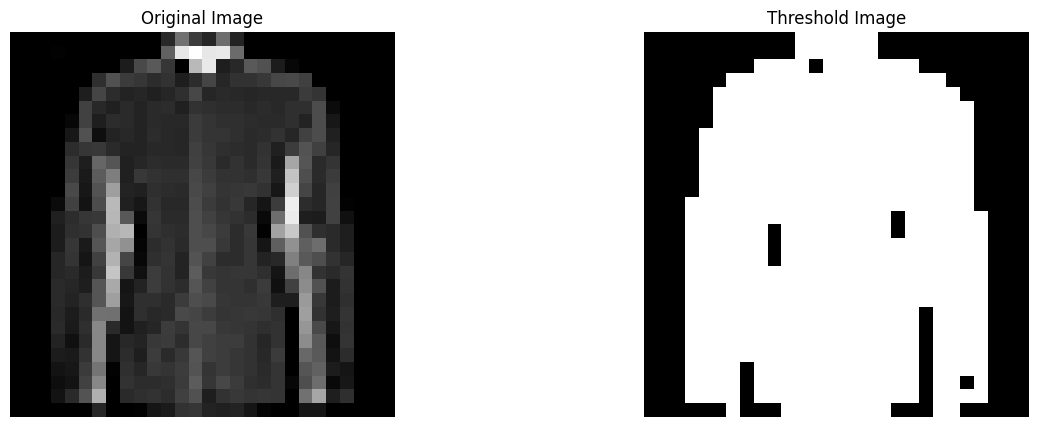

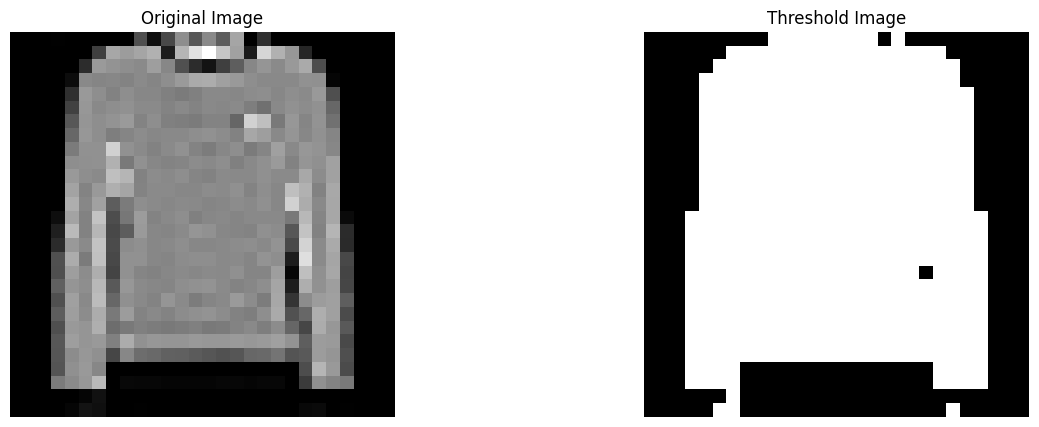

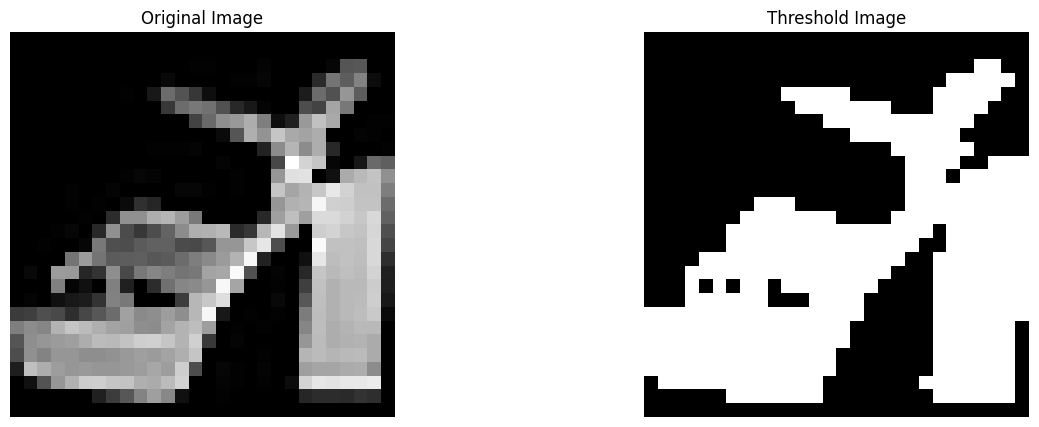

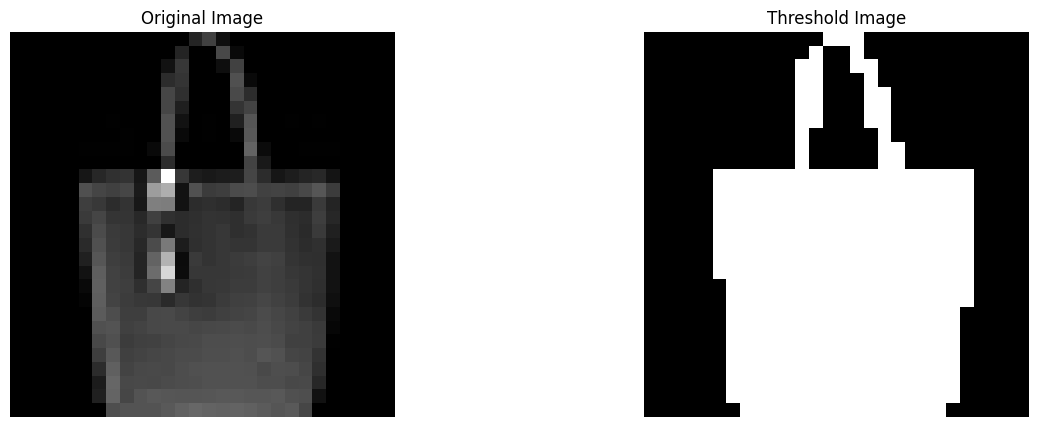

FOR THRESHOLD VALUE: 75


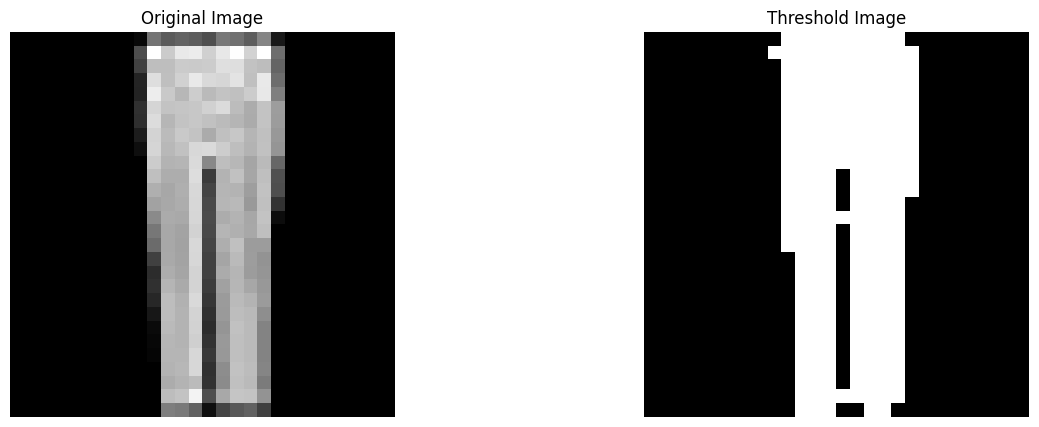

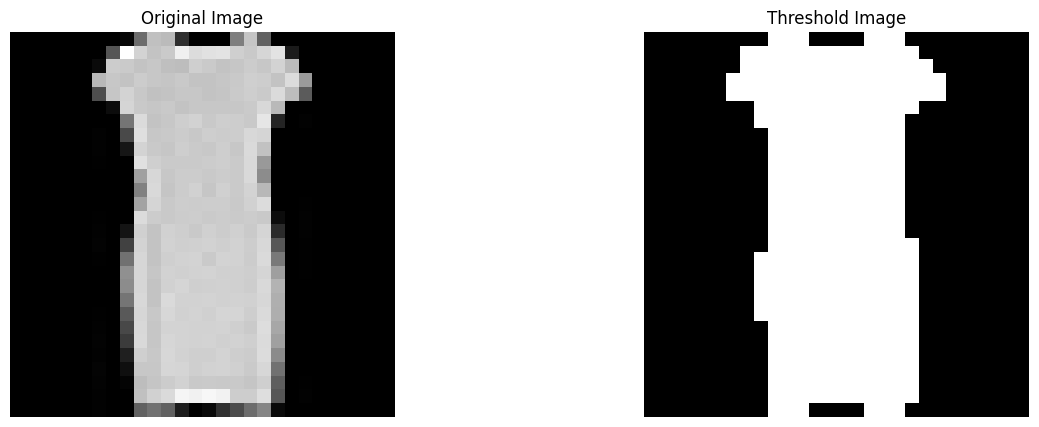

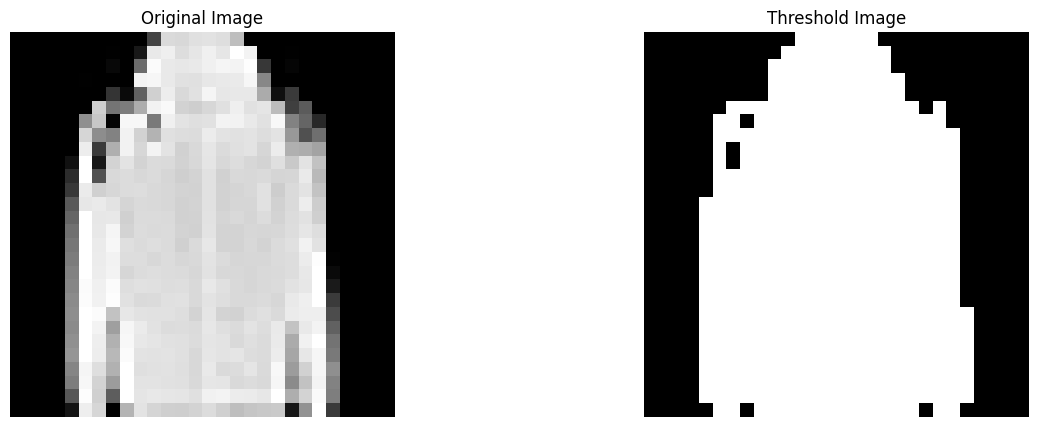

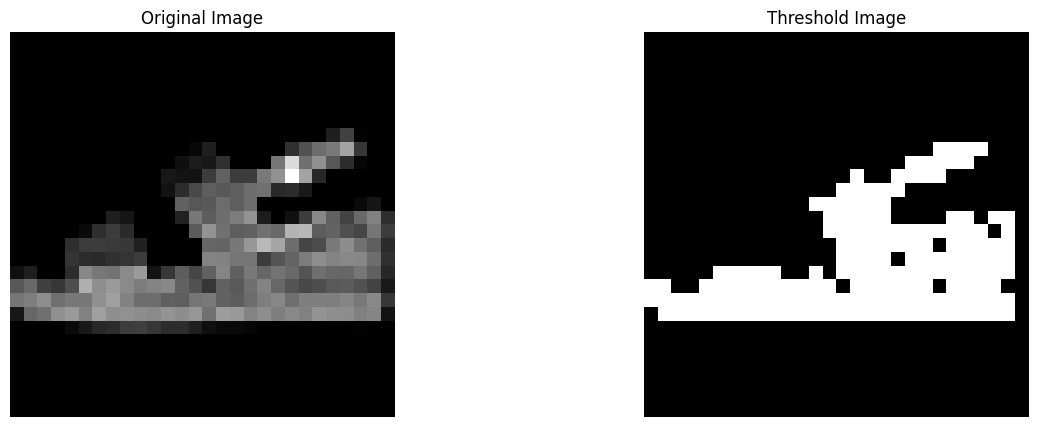

FOR THRESHOLD VALUE: 35


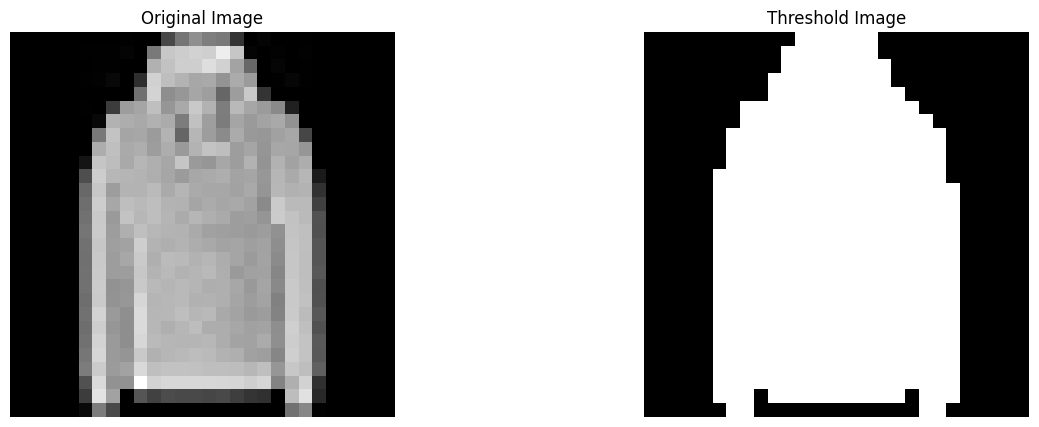

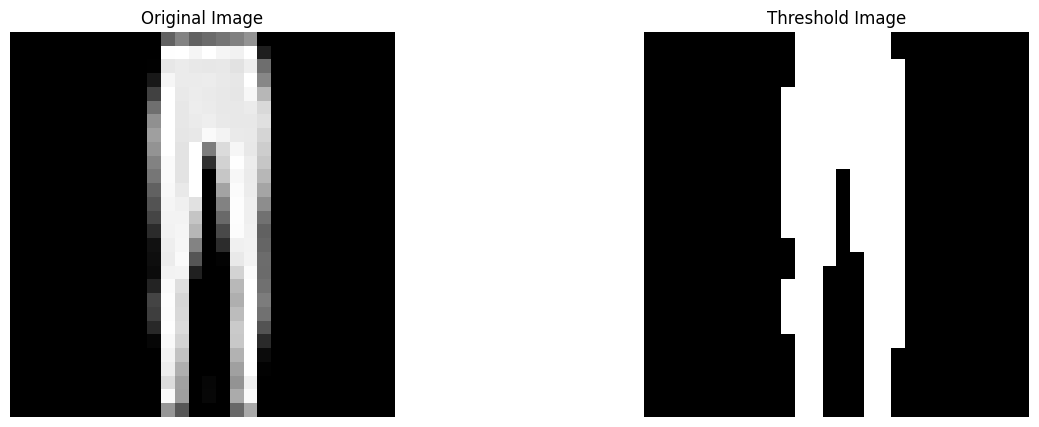

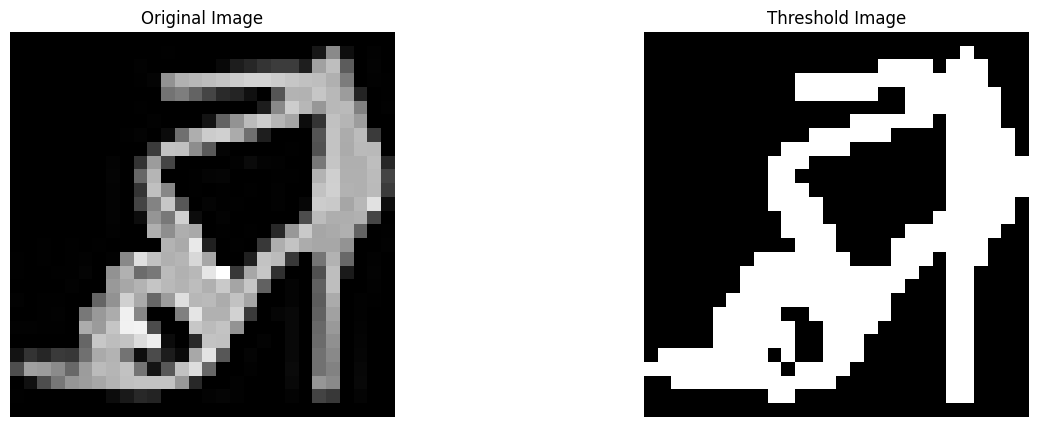

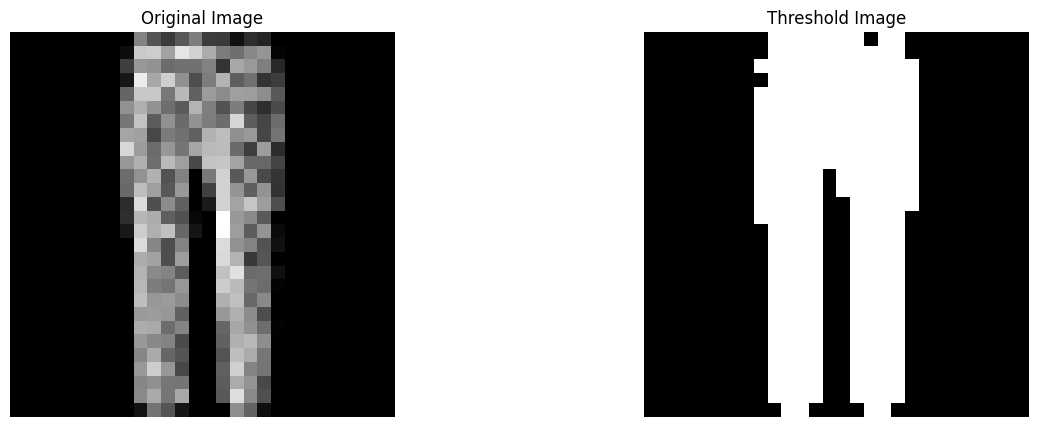

FOR THRESHOLD VALUE: 90


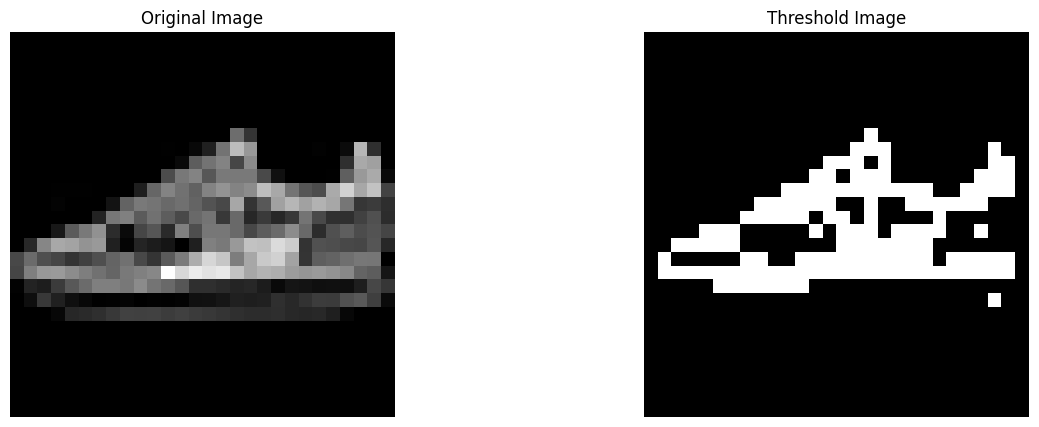

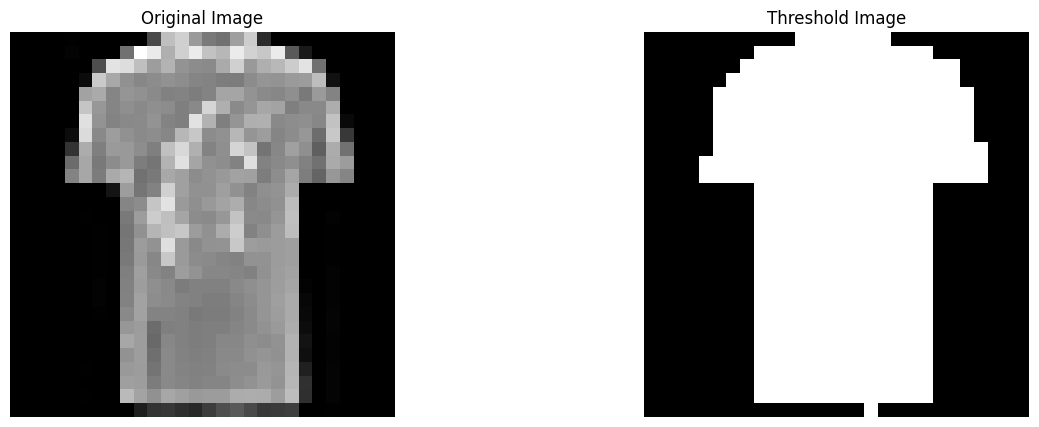

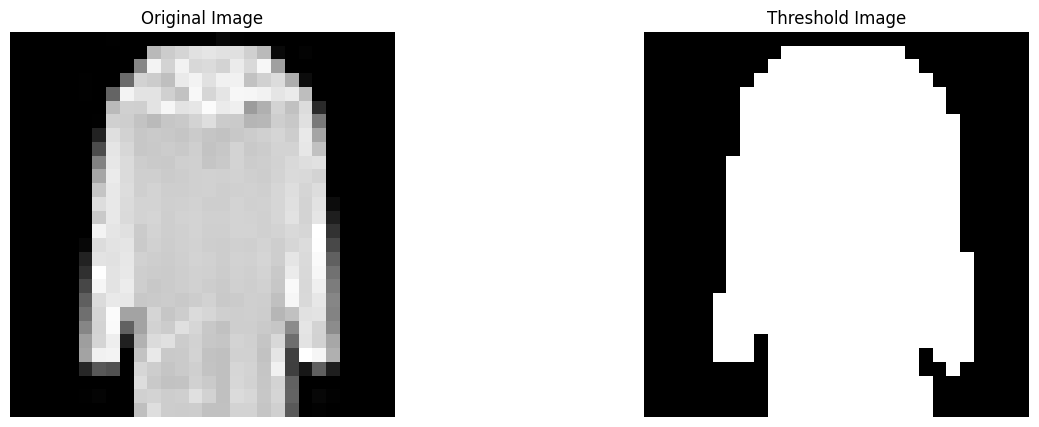

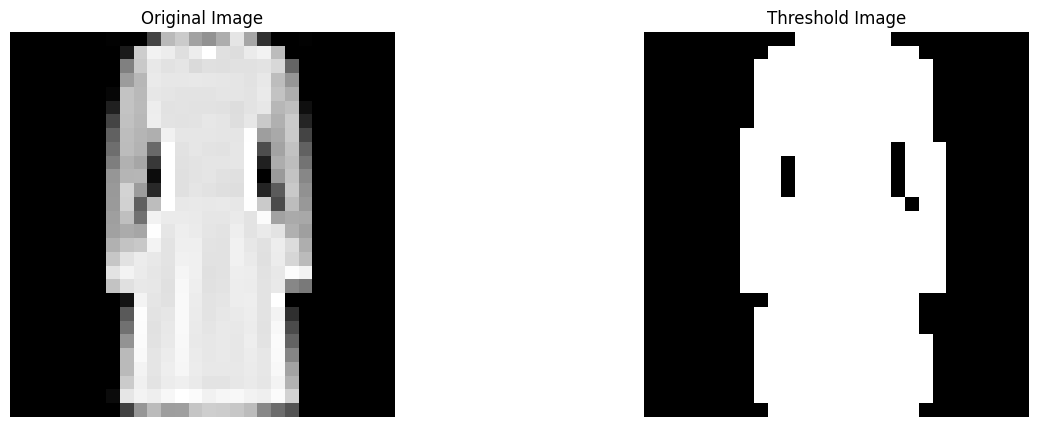

In [10]:
threshold = [10,75,35,90]
for i in range(4):
  print(f"FOR THRESHOLD VALUE: {threshold[i]}")
  for j in range(len(threshold)):
    random_index = random.randint(0, len(train_images) - 1)
    img = train_images[random_index]
    img_threshold = image_thresholding(img,threshold[i])
    display(img, img_threshold, 'Original Image', 'Threshold Image')

# **Perform gray level slicing with and without background intensity slicing**

In [14]:
def grey_level_slicing_without_background(image,a,b):
  gls_without_bg = []
  for i in range(len(image)):
    temp = []
    for j in range(len(image)):
      if(image[i][j]>=a and image[i][j]<=b):
        s = 255
      else:
        s = 0
      temp.append(s)
    gls_without_bg.append(temp)
  return np.array(gls_without_bg)

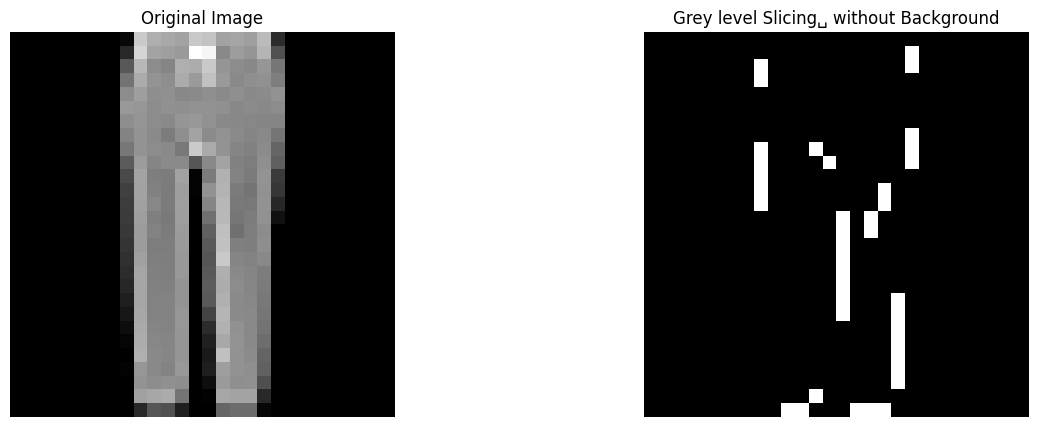

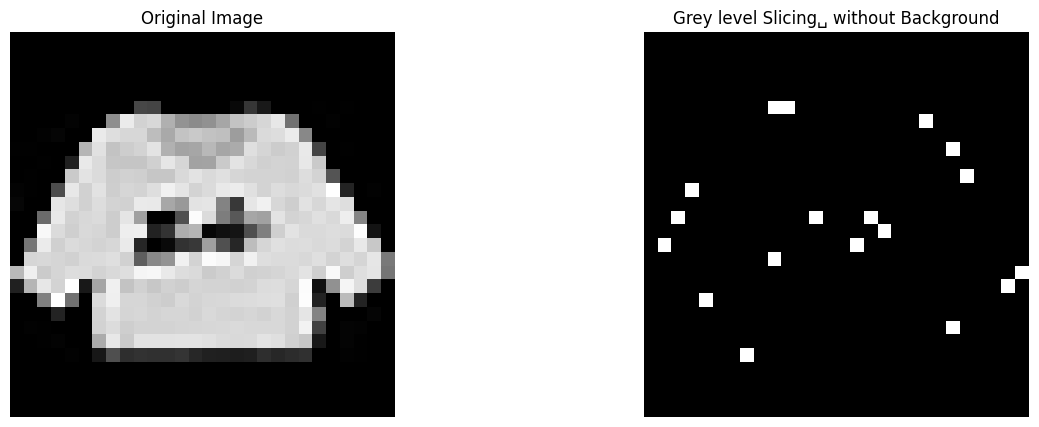

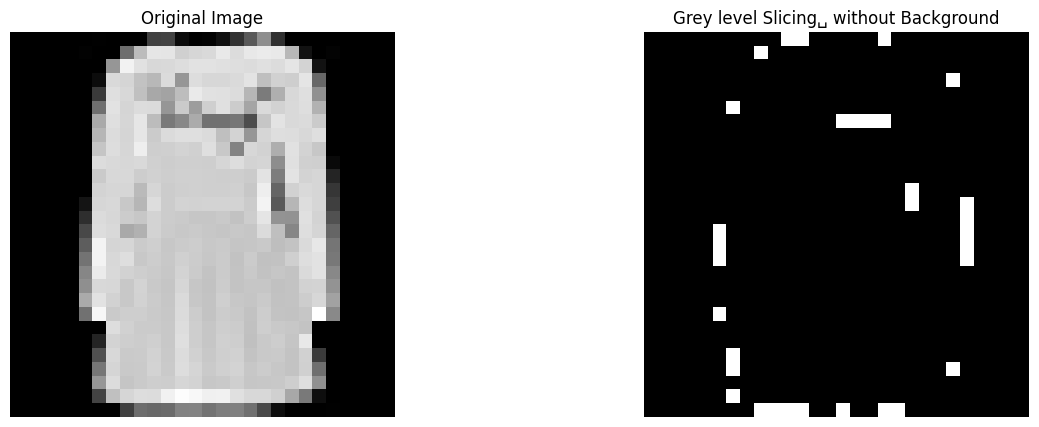

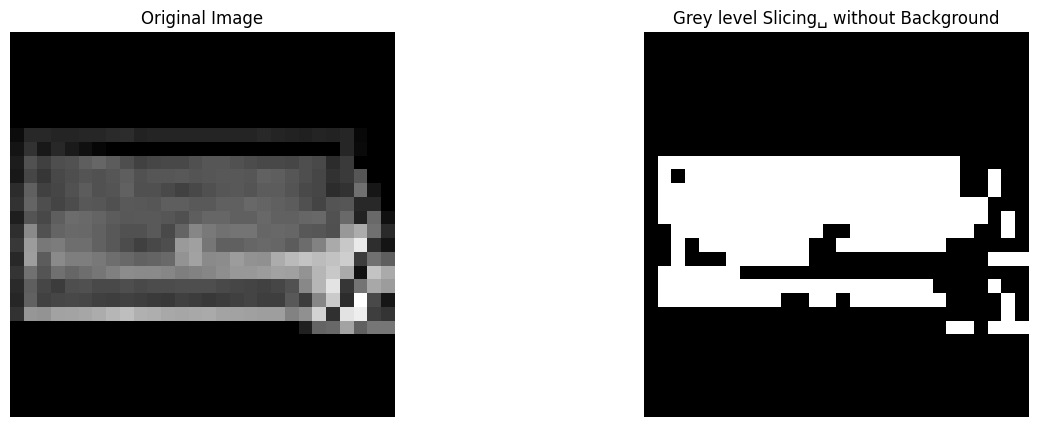

In [16]:
for i in range(4):
  random_index = random.randint(0, len(train_images) - 1)
  img = train_images[random_index]
  img_gls_without_bg = grey_level_slicing_without_background(img,60,120)
  display(img, img_gls_without_bg, 'Original Image', 'Grey level Slicing␣ without Background')


In [11]:
def grey_level_slicing_with_background(image,a,b):
  gls_without_bg = []
  for i in range(len(image)):
    temp = []
    for j in range(len(image)):
      if(image[i][j]>=a and image[i][j]<=b):
        s = image[i][j]
      else:
        s = 0
      temp.append(s)
    gls_without_bg.append(temp)
  return np.array(gls_without_bg)


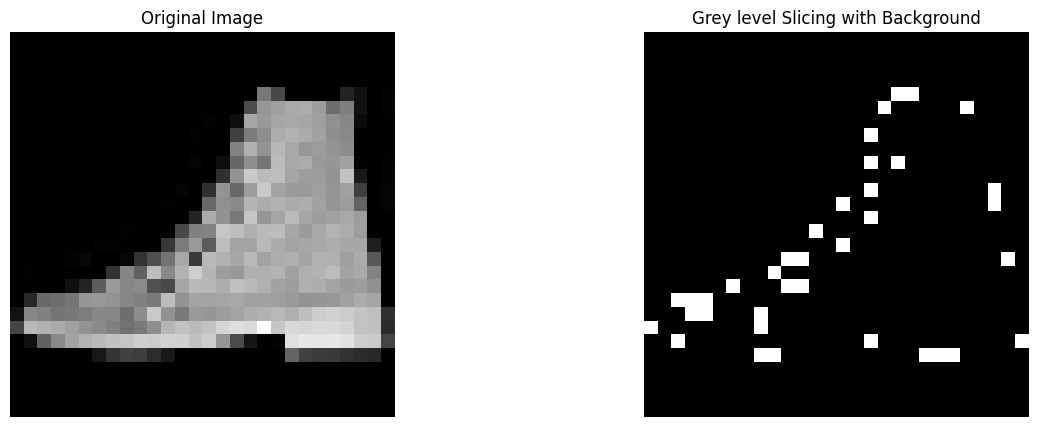

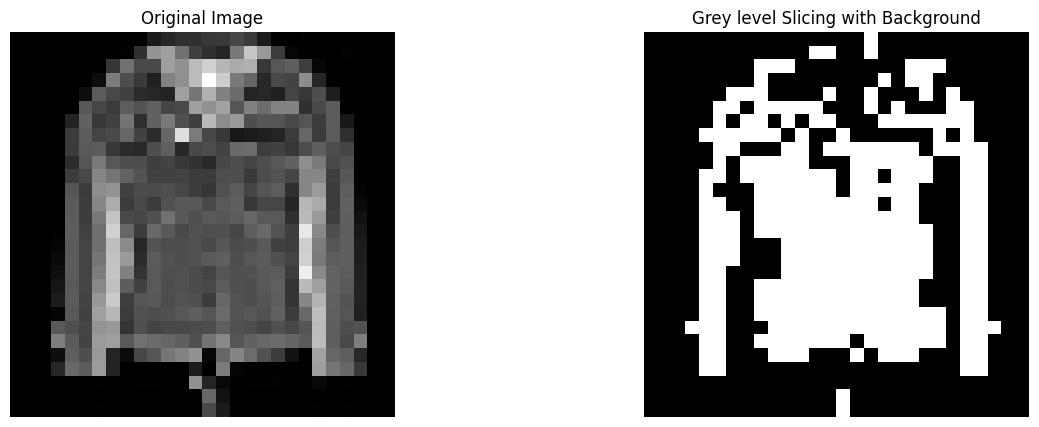

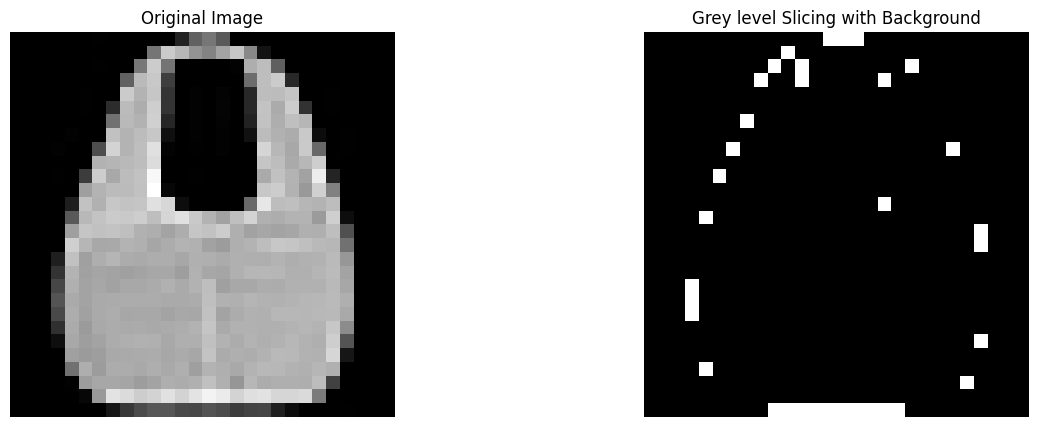

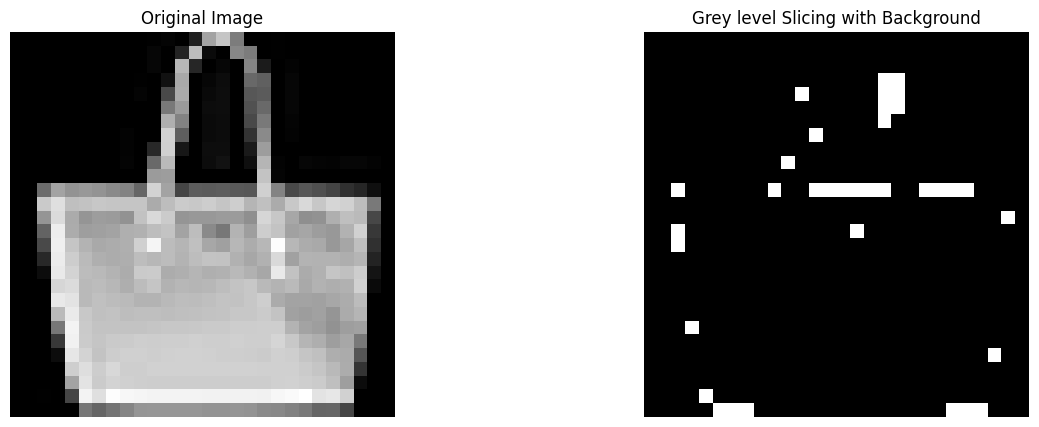

In [18]:
for i in range(4):
  random_index = random.randint(0, len(train_images) - 1)
  img = train_images[random_index]
  img_gls_with_bg = grey_level_slicing_without_background(img,60,120)
  display(img, img_gls_with_bg, 'Original Image', 'Grey level Slicing with Background')

# **Implementing the above procedures on random images**

**Reading an image**

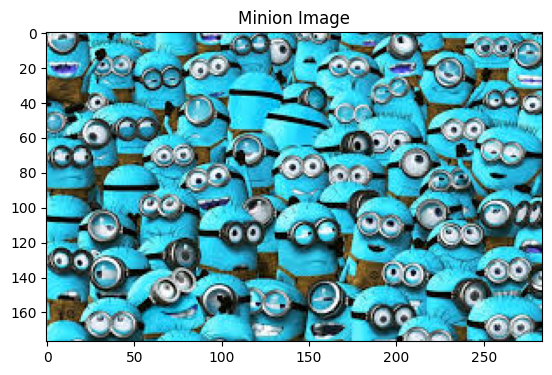

In [19]:
image = cv.imread("images.jpg")
plt.imshow(image)
plt.title("Minion Image")
plt.show()

**Grayscale of an image**

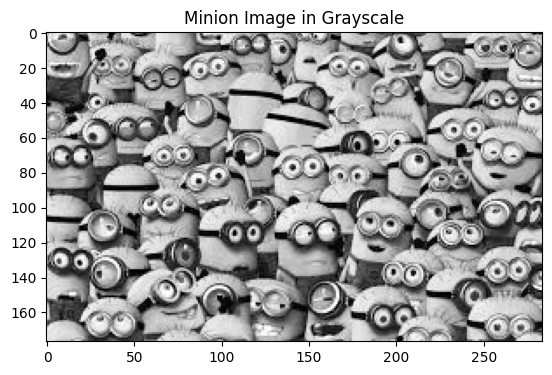

In [21]:
gray_scale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray_scale_image, cmap='gray')
plt.title("Minion Image in Grayscale")
plt.show()

Text(0.5, 1.0, 'Grey Scale')

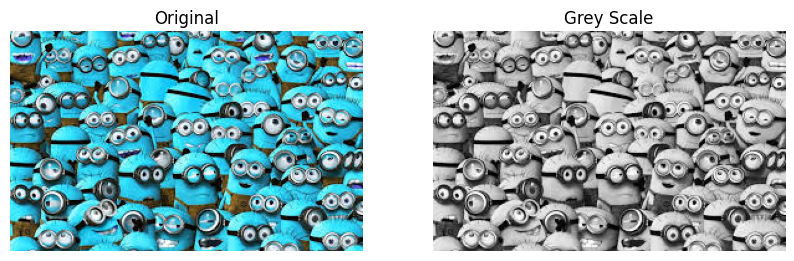

In [22]:
fig=plt.figure(figsize=(10,7))
fig.add_subplot(1,2,1)
plt.imshow(image)
plt.axis('off')
plt.title("Original")
fig.add_subplot(1,2,2)
plt.imshow(gray_scale_image,cmap="gray")
plt.axis('off')
plt.title("Grey Scale")


**Negative of an image**

Text(0.5, 1.0, 'Negative Image')

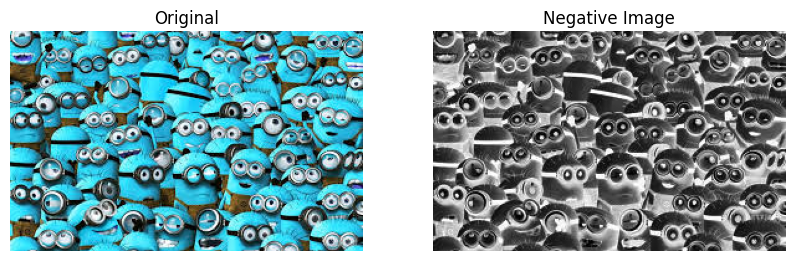

In [23]:
negative_image = neg(gray_scale_image)
fig=plt.figure(figsize=(10,7))
fig.add_subplot(1,2,1)
plt.imshow(image)
plt.axis('off')
plt.title("Original")
fig.add_subplot(1,2,2)
plt.imshow(negative_image,cmap="gray")
plt.axis('off')
plt.title("Negative Image")

**Threshhold of an image**

Text(0.5, 1.0, 'Threshold Image')

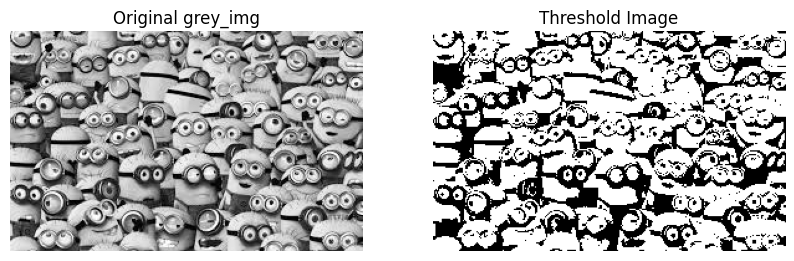

In [25]:
threshold_image = image_thresholding(gray_scale_image,127)
fig=plt.figure(figsize=(10,7))
fig.add_subplot(1,2,1)
plt.imshow(gray_scale_image,cmap="gray")
plt.axis('off')
plt.title("Original grey_img")
fig.add_subplot(1,2,2)
plt.imshow(threshold_image,cmap="gray")
plt.axis('off')
plt.title("Threshold Image")

**Gray level slicing with and without the background of an image**

In [27]:
gls_without_bg_image = grey_level_slicing_without_background(gray_scale_image,27,127)

Text(0.5, 1.0, 'Gray Level Slicing Without Background Image')

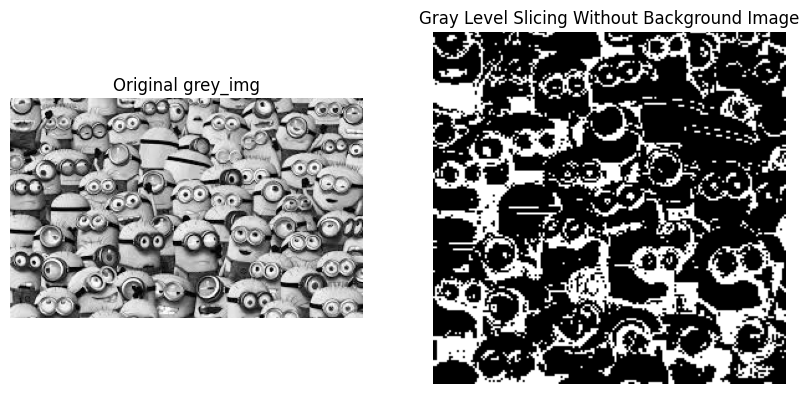

In [28]:
fig=plt.figure(figsize=(10,7))
fig.add_subplot(1,2,1)
plt.imshow(gray_scale_image,cmap="gray")
plt.axis('off')
plt.title("Original grey_img")
fig.add_subplot(1,2,2)
plt.imshow(gls_without_bg_image,cmap="gray")
plt.axis('off')
plt.title("Gray Level Slicing Without Background Image")


In [29]:
gls_with_bg_image = grey_level_slicing_with_background(gray_scale_image,27,127)

Text(0.5, 1.0, 'Gray Level Slicing With Background Image')

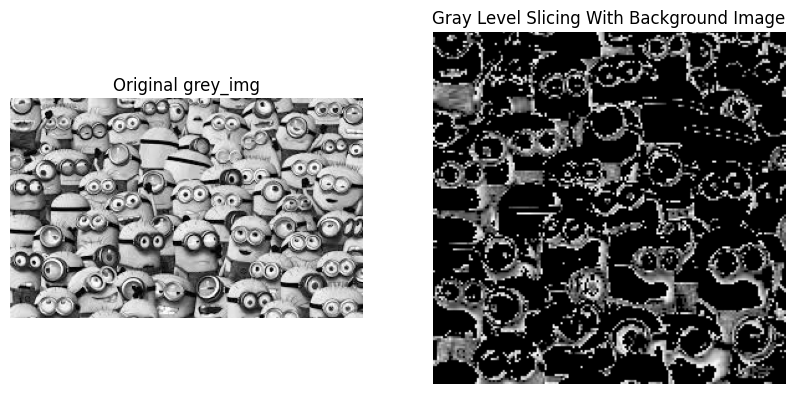

In [30]:
fig=plt.figure(figsize=(10,7))
fig.add_subplot(1,2,1)
plt.imshow(gray_scale_image,cmap="gray")
plt.axis('off')
plt.title("Original grey_img")
fig.add_subplot(1,2,2)
plt.imshow(gls_with_bg_image,cmap="gray")
plt.axis('off')
plt.title("Gray Level Slicing With Background Image")


# **Observations for Image Thresholding**

Image thresholding is a method that turns an image into a binary format in order to make it simpler. When the threshold is set low, more of the image—including the object of interest and any background or noise that might be undesirable—is identified as the foreground. This can make it difficult to distinguish an object from its background, especially in low contrast photos.

Only the brightest pixels are included in the object at high threshold settings, which might cause significant features to be lost because darker areas are categorised as the background. Although it can oversimplify the image, this thresholding level is helpful for separating bright items from dark backgrounds.


# **Obsevations for Gray Level Slicing with and without background**

Gray level slicing with the background retains context, emphasizing selected intensities while maintaining visibility of the entire image.

Gray level slicing without the background isolates the highlighted regions, removing irrelevant information and offering a sharper contrast.

# **Applications**

**Negative Image:**

1. *Medical Imaging*: Negative imaging is commonly used in X-ray and MRI scans to highlight structures that are hard to discern in their original form. By inverting the pixel intensity, it becomes easier to identify abnormalities such as fractures, tumors, or blockages.

2. *Astronomical Imaging*: In astronomy, negative images are useful for identifying faint objects such as stars and galaxies that may not be visible in a positive image. The contrast enhancement brought by inverting pixel values allows faint details to stand out.
3. *Forensic Analysis*

**Gray Level Slicing**

1. *Remote Sensing*: Gray level slicing is employed in satellite imaging to highlight specific features like water bodies, vegetation, or urban areas. By emphasizing certain gray levels, particular regions of interest can be isolated and studied more easily.

2. *Medical Diagnostics*: In medical imaging, gray slicing helps in enhancing certain tissues or organs by highlighting a specific range of pixel intensities, allowing radiologists to better diagnose conditions by focusing on the desired anatomical regions.
3. *Industrial Quality Control*

**Image Thresholding**

1. *Document Image Binarization*: Thresholding is widely used in converting scanned documents into binary images, separating the text from the background. This makes it easier for Optical Character Recognition (OCR) systems to process and digitize the document.

2. *Object Detection in Industrial Automation*: Thresholding is used to detect objects on production lines, such as identifying defects, parts, or items. By isolating objects from the background, automated systems can easily track and process them.

3. *Traffic Monitoring*

# **Conclusion**


In conclusion, the experiment demonstrated how different image processing techniques—negative imaging, gray level slicing, and thresholding—can be used to enhance or isolate specific features in images. Negative imaging highlighted subtle details by inverting pixel intensities, while gray slicing effectively emphasized particular intensity ranges with or without background, depending on the desired focus. Image thresholding simplified the image by converting it into binary form, enabling clear segmentation of objects. These techniques offer valuable tools in applications like medical imaging, industrial inspection, and object detection, each with distinct advantages based on the image characteristics.